In [1]:
from corsort import corsort, quicksort, entropy_bound, evaluate_convergence
from matplotlib import pyplot as plt
import numpy as np
from multiprocess.pool import Pool
import dill as pickle

In [2]:
sort_list = [quicksort, corsort]
n_t = 10000
n = 1000

In [3]:
with Pool(15) as p:
    convergence = evaluate_convergence(sort_list=sort_list, n=n, nt=n_t, pool=p)

Evaluate convergence of quicksort for n = 1000


100%|██████████| 10000/10000 [1:11:41<00:00,  2.33it/s]


Evaluate convergence of corsort for n = 1000


 24%|██▍       | 2406/10000 [2:17:08<8:04:11,  3.83s/it] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
with open(f'convergence_{n_t}.pkl', 'wb') as f:
    pickle.dump(convergence, f)

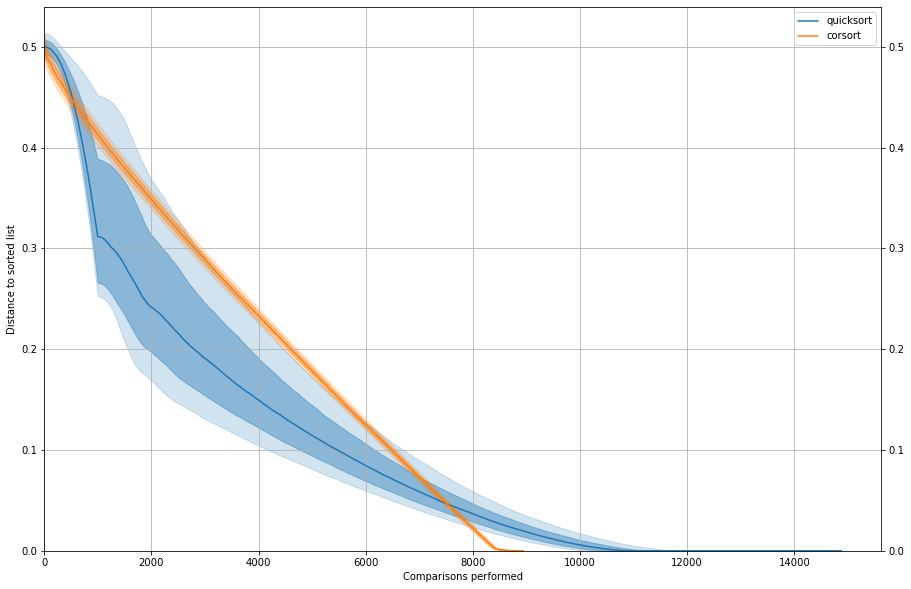

In [8]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

m = n*(n-1)/2
fig = plt.figure(figsize=(15, 10))
ax = plt.axes()
for color, ns in zip(colors, convergence.items()):
    name, ref = ns
    p_m = ref.shape[1]
    q = np.zeros((5, p_m))
    for i, per in enumerate([10, 25, 50, 75, 90]):
        q[i, :] = np.percentile(ref, per, axis=0)
    q = q/m
    ax.plot(np.arange(p_m), q[2, :], label=name, color=color)
    ax.fill_between(np.arange(p_m), q[1, :], q[3, :], alpha=.4, color=color)
    ax.fill_between(np.arange(p_m), q[0, :], q[4, :], alpha=.2, color=color)
plt.legend()
plt.grid()
ax.tick_params(labelright=True, right=True)
plt.ylabel('Distance to sorted list')
plt.xlabel('Comparisons performed')
plt.ylim([0, None])
plt.xlim([0, None])
plt.show()

# Single trajectory

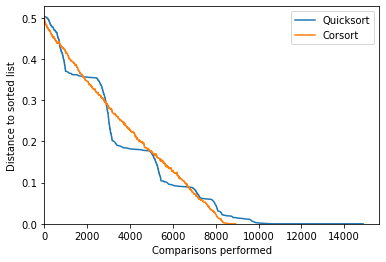

In [6]:
xp=5
plt.plot(convergence['quicksort'][xp, :]/m, label="Quicksort")
plt.plot(convergence['corsort'][xp, :]/m, label="Corsort")
# plt.plot([0, entropy_bound(n)], [.5, 0])
plt.ylabel('Distance to sorted list')
plt.xlabel('Comparisons performed')
plt.ylim([0, None])
plt.xlim([0, None])
plt.legend()
plt.show()